In [118]:
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [119]:
iris = sns.load_dataset("iris")


data = torch.tensor(iris[iris.columns[0:4]].values).float()


labels = torch.zeros(len(data), dtype= torch.long)

labels[iris.species == "setosa"] = 0
labels[iris.species == "versicolor"] = 1
labels[iris.species == "viriginica"] = 2

### Step 1 split the Data


In [120]:
def per_to_nums(per):
   return int(per* data.shape[0])

In [121]:
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, train_size= per_to_nums(.8))


train_tensor = TensorDataset(train_data , train_labels)
test_tensor = TensorDataset(test_data , test_labels)

train_tensor = DataLoader(train_tensor, shuffle=True, batch_size = 5)
test_tensor = DataLoader(test_tensor, shuffle= True, batch_size = test_labels.shape[0])

###Make the Model

In [122]:
class model(nn.Module):
  def __init__(self, in_dim, out_dim):
    super().__init__()

    self.lay1 = nn.Linear(in_dim, 13)
    self.lay2 = nn.Linear(13, 15)
    self.lay3 = nn.Linear(15, out_dim)

  def forward(self, x, prob):
    x = self.lay1(x)
    x = F.relu(x)
    x = F.dropout(x , prob , self.training)
    x = self.lay2(x)
    x = F.relu(x)
    x = F.dropout(x, prob, self.training)
    x = self.lay3(x)
    x = F.softmax(x, dim=1)

    return x





### Use the model


In [123]:
my_model = model(4,3)

learning_rate = .1
epochs = 1500

loss_fun = nn.CrossEntropyLoss()
optim = torch.optim.SGD(my_model.parameters(), lr = learning_rate)


In [124]:
losses = []
for i in range(epochs):
  batch_losses = []
  for d,l in train_tensor:
    my_model.train()

    y_hat = my_model.forward(d, .5)

    loss = loss_fun(y_hat, l)
    batch_losses.append(loss.detach())

    optim.zero_grad()
    loss.backward()
    optim.step()

  avg_loss = sum(batch_losses)/ len(batch_losses)
  losses.append(avg_loss)


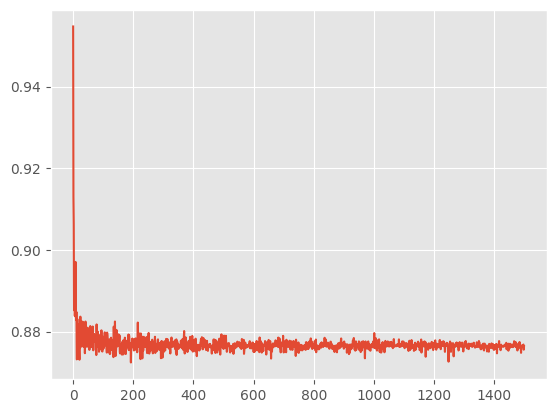

In [125]:
plt.plot(range(epochs),losses)
plt.show()

In [126]:
final_pred = None

final_loss = None

is_correct_arr = []

my_model.eval()
with torch.no_grad():
  for d,l in test_tensor:
    final_pred = my_model.forward(d, .5)
    final_loss = loss_fun(final_pred, l)


    is_correct = final_pred.argmax(dim=1).eq(l)
    print(is_correct)



tensor([ True, False, False, False, False, False,  True,  True,  True, False,
         True,  True,  True, False, False,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True, False,  True, False])


In [127]:
sumed = sum(is_correct) / len(test_labels)
print(sumed)

tensor(0.6333)
